In [55]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, models
from torchvision.models import resnet18, ResNet18_Weights
from PIL import Image

In [3]:
pic_dir_path = r"D:\data\pics"

In [34]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

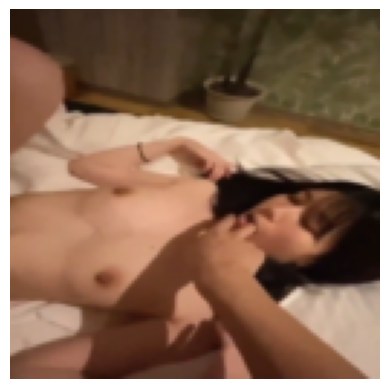

In [35]:
image = Image.open(os.path.join(pic_dir_path, "p_2.png"))
resized_image = transform(image)
plt.imshow(resized_image.permute(1, 2, 0))
plt.axis('off')
plt.show()

In [45]:
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        image = Image.open(img_path).convert("RGB")  # 确保是 RGB 图像

        if self.transform:
            image = self.transform(image)

        return image, label

In [46]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [58]:
img_dir = Path(pic_dir_path)
image_paths = list(img_dir.glob("*.png"))
train_paths, labels = [], []
for image_path in image_paths:
    if image_path.name[0] == 'n':
        train_paths.append(image_path)
        labels.append(0)
    else:
        train_paths.append(image_path)
        labels.append(1)
train_paths = train_paths * 10
labels = labels * 10

In [59]:
dataset = CustomImageDataset(train_paths, labels, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)
for images, labels in dataloader:
    print(images.shape, labels.shape)

torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size([8, 3, 224, 224]) torch.Size([8])
torch.Size

In [61]:
num_classes = 2
batch_size = 8
num_epochs = 30
lr = 1e-4
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"[Epoch {epoch+1}/{num_epochs}] Loss: {total_loss:.4f}")

cuda
[Epoch 1/30] Loss: 10.7167
[Epoch 2/30] Loss: 3.5968
[Epoch 3/30] Loss: 0.8940
[Epoch 4/30] Loss: 7.0798
[Epoch 5/30] Loss: 2.7149
[Epoch 6/30] Loss: 0.3673
[Epoch 7/30] Loss: 4.6710
[Epoch 8/30] Loss: 5.3791
[Epoch 9/30] Loss: 4.8495
[Epoch 10/30] Loss: 3.7683
[Epoch 11/30] Loss: 2.4308
[Epoch 12/30] Loss: 3.4329
[Epoch 13/30] Loss: 6.0415
[Epoch 14/30] Loss: 1.0818
[Epoch 15/30] Loss: 2.9449
[Epoch 16/30] Loss: 1.0095
[Epoch 17/30] Loss: 4.3926
[Epoch 18/30] Loss: 2.4572
[Epoch 19/30] Loss: 4.3552
[Epoch 20/30] Loss: 0.6625
[Epoch 21/30] Loss: 1.2062
[Epoch 22/30] Loss: 3.1540
[Epoch 23/30] Loss: 0.7348
[Epoch 24/30] Loss: 0.1394
[Epoch 25/30] Loss: 1.8333
[Epoch 26/30] Loss: 6.9541
[Epoch 27/30] Loss: 0.1962
[Epoch 28/30] Loss: 3.2424
[Epoch 29/30] Loss: 0.2284
[Epoch 30/30] Loss: 2.2603


In [63]:
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc = 100 * correct / total
print(f"Accuracy: {acc:.2f}%")

Accuracy: 100.00%


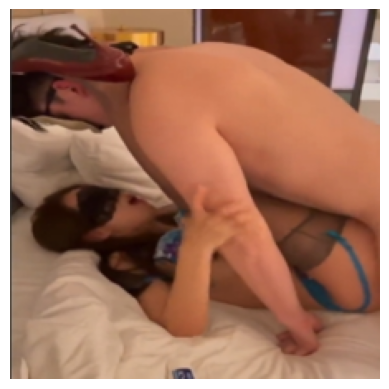

In [64]:
image = Image.open(os.path.join(pic_dir_path, "p_20.png"))
resized_image = transform(image)
plt.imshow(resized_image.permute(1, 2, 0))
plt.axis('off')
plt.show()

In [66]:
idx_to_label = {0:"正常图片", 1:"黄色图片"}

input_tensor = resized_image.unsqueeze(0).to(device)
print(input_tensor.shape)
with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted_class = predicted.item()
print("Predicted label:", idx_to_label[predicted_class])

torch.Size([1, 3, 224, 224])
Predicted label: 黄色图片


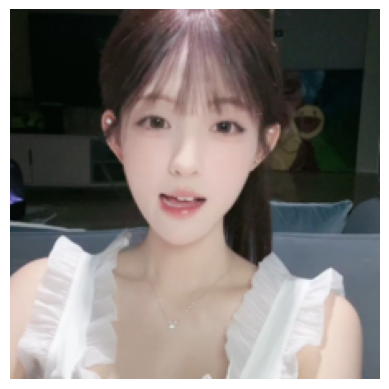

In [67]:
image = Image.open(os.path.join(pic_dir_path, "n_49.png"))
resized_image = transform(image)
plt.imshow(resized_image.permute(1, 2, 0))
plt.axis('off')
plt.show()

In [68]:
input_tensor = resized_image.unsqueeze(0).to(device)
print(input_tensor.shape)
with torch.no_grad():
    outputs = model(input_tensor)
    _, predicted = torch.max(outputs, 1)
    predicted_class = predicted.item()
print("Predicted label:", idx_to_label[predicted_class])

torch.Size([1, 3, 224, 224])
Predicted label: 正常图片
